In [77]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [75]:
class LARS:

    def __init__(self, tol=1e-6, verbose=False) -> None:

        self.coefs_ = None
        self.tol = tol
        self.active_set = set()
        self.residual = [100]


    def standardize(self, X):

        mu = X.mean(axis=0)
        std = X.std(axis=0)

        return (X - mu) / std
    

    def predict(self, X):

        if self.m is None:

            self.m = X.shape[0]
        
        X = np.hstack((np.ones((self.m, 1)), X))
        return np.dot(X, self.coefs_)
    

    def fit(self, X, y):

        self.m, self.n = X.shape
        X = self.standardize(X)
        X = np.hstack((np.ones((self.m, 1)), X))
        
        if y.ndim == 1:

            self.coefs_ = np.zeros((self.n + 1, ))
        
        else:

            self.coefs_ = np.zeros((self.n + 1, 1))
        

        while len(self.active_set) != self.n and np.linalg.norm(self.residual[-1]) >= self.tol:

            residual = y - np.dot(X, self.coefs_)
            self.residual.append(residual)

            most_corr_feature = np.argmax(np.abs(np.dot(X[:, 1:].T, residual))) + 1
            self.active_set.add(most_corr_feature)
            self.coefs_[list(self.active_set)] = np.dot(np.linalg.pinv(X[:, list(self.active_set)]), y)


Mean Squared Error: 74.1632


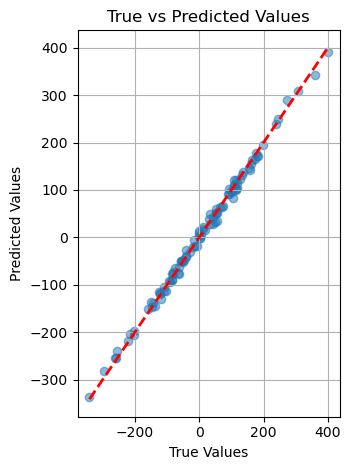

In [79]:
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

lars = LARS(tol=1e-6, verbose=True)
lars.fit(X, y)
predictions = lars.predict(X)

mse = np.mean((predictions - y) ** 2)
print(f"Mean Squared Error: {mse:.4f}")


plt.subplot(1, 2, 2) 
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()